# HEIGHT PREDICTION ACCORDING TO WEIGHT OF STUDENT USING SIMPLE LINEAR REGRESSION(continuous output values)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


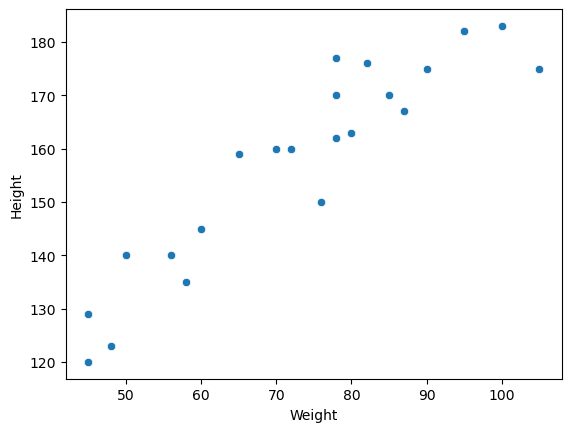

In [5]:
#seaborn identifies the columns from the name directly whereas in matplot lib we have to provid the dataframe pointer to the function
sns.scatterplot(x = 'Weight', y = 'Height', data = df)
plt.show()

## FINDING CORRELATION BETWEEN VARIABLES

In [6]:
corr = df.corr()

In [7]:
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')

<Axes: >

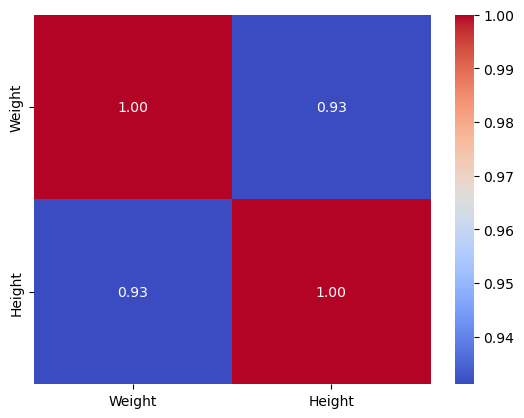

In [8]:
plt.show()

In [9]:
#Independent and dependent feature sepearation , they should be of type dataframe
X = df[['Weight']] #Even if you only have one feature, it's still treated as a column vector, not a plain list.
y  = df['Height'] #can be in series or 1D arr form
type(X)

pandas.core.frame.DataFrame

In [10]:
type(y)

pandas.core.series.Series

In [11]:
X.head(2)

,Weight
0,45
1,58


In [12]:
y.head(2)

0    120
1    135
Name: Height, dtype: int64

## TRAIN TEST SPLIT

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42) 

X_train.shape #17 rows/examples and 1 feature 

In [14]:
X_test.shape

(6, 1)

## STANDARDISATION 

In [15]:
#WE TAKE EACH INDIVIDUAL FEATURE AND APPLY Z SCORE,CONVERT EACH INDIVIDUAL DATA POINT TO MEAN O AND SD 1

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()   #initializing the object, no parameters passed

In [18]:
X_train = scaler.fit_transform(X_train)  # attribute fit_transform of the scaler object is retrieved giving the desired parameter
#converts into a 2d arr

In [19]:
X_test = scaler.transform(X_test)
#we use mean and SD of train itself here inorder to avoid data leakage from test to train as we can later identify the performance quality only if train set dont know anything about test

## APPLYING SIMPLE LINEAR REGRESSION

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regression = LinearRegression(n_jobs = -1)

In [22]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [23]:
regression.coef_  #disply the coeff 'w' used in gradient descent to train the model, here only 1 is there as we have only one feature
#1 unit movement in weight value(x axis) leads to 17.3unit movement in height value

array([17.2982057])

In [24]:
regression.intercept_ # intercept 'b' value

156.47058823529412

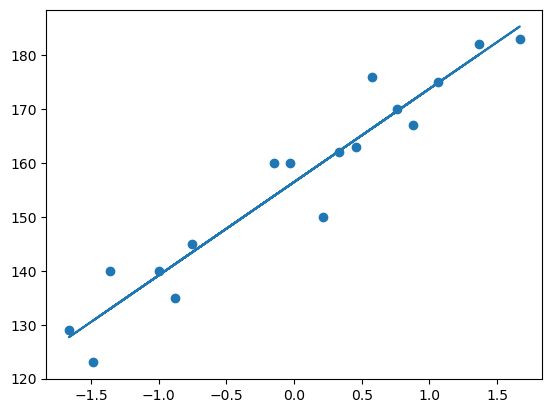

In [25]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train)) #plot predicted value from xtrain data wrt xtrain
plt.show()

### PREDICTION ON TEST DATA

In [26]:
y_pred = regression.predict(X_test) #height = intercept_+coef_*(weight)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

In [28]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [29]:
mse

114.84069295228699

In [30]:
mae

9.665125886795005

In [31]:
rmse

10.716374991212605

MAE is robust, even if there are a few big mistakes

RMSE will spike if your model makes any large errorshecking both gives you a balanced view:

If both are low → model is performing well overall
If RMSE ≫ MAE → you're likely making some bad predictions



We use MSE, MAE, and RMSE to measure how much error occurred in the model’s predictions, and we use R-squared and Adjusted R-squared to understand how well the model fits the data — that is, what percentage of the variability in the target variable the model is able to explain."

In [32]:
from sklearn.metrics import r2_score

In [37]:
score = r2_score(y_test, y_pred)

In [34]:
score #model able to explain 73% variance in data

0.7360826717981276

In [39]:
adj_r2 = 1 - (1 -  score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[-1] - 1)
adj_r2

0.6701033397476595

# PREDICTION OF NEW DATA

In [35]:
regression.predict([[120]]) #give as 2d array always
#2232.25527276 comes up as answer because we didnt standardise the value, we should always do that

array([2232.25527276])

In [36]:
regression.predict(scaler.transform([[55]]))

C:\Users\HARIKESH REJI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([138.16272159])